In [1]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns

# Titanic veri setinin GitHub URL'si
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Veriyi indirme
response = requests.get(url)

# Yanıtı DataFrame'e yükleme
titanic = pd.read_csv(StringIO(response.text))

# Veri setinin ilk birkaç satırını görelim
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# PassengerId, Name, Ticket sütunlarını veri setinden çıkaralım çünkü bu sütunlar modelde bir anlam ifade etmiyor
# Cabin sütununu da çıkaralım çünkü çok fazla eksik değer içeriyor
# axis=1, sütunları belirtir
# inplace=True, veri setini değiştirir

titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

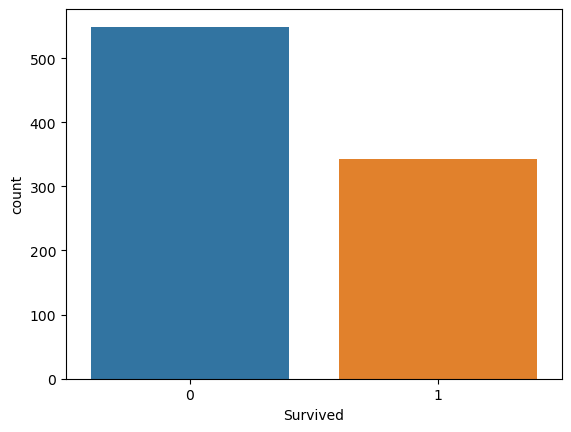

In [5]:
# Survived sütununu dağılımını görelim
sns.countplot(x='Survived', data=titanic)

In [196]:
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [197]:
# Eksik değerleri kontrol edelim
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
# Eksik değerleri doldurma
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [12]:
# En çok tekrar eden değer ile doldurma
titanic["Embarked"] = titanic["Embarked"].fillna("C") # En çok tekrar eden değer ile dolduracaktık ama Gizem'in önerisi ile C ile doldurduk :)

In [13]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
from sklearn.neighbors import LocalOutlierFactor

# LocalOutlierFactor sınıfını oluşturalım
lof = LocalOutlierFactor()

# Sayısal sütunları seçelim
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# LOF algoritmasını uygulayalım
outliers = lof.fit_predict(titanic[numeric_columns])

In [15]:
# LOF algoritması, -1 değerini verdiği gözlemler, aykırı değerlerdir
outlier_indices = [i for i, x in enumerate(outliers) if x == -1]

# Aykırı değerleri içeren gözlemleri seçelim
outliers_df = titanic.iloc[outlier_indices]

# Aykırı değerleri görelim	
outliers_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,29.699118,0,0,8.4583,Q
33,0,2,male,66.000000,0,0,10.5000,S
39,1,3,female,14.000000,1,0,11.2417,C


In [16]:
# Aykırı değerleri içeren gözlemleri seçelim
outlier_indices = [i for i, x in enumerate(outliers) if x == -1]

# Aykırı değerleri içeren gözlemleri ortalamalar ile dolduralım
for index in outlier_indices:
    for column in numeric_columns:
        titanic.loc[index, column] = titanic[column].mean()


C:\Users\Victus\AppData\Local\Temp\ipykernel_16620\2916626026.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5230078563411896' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic.loc[index, column] = titanic[column].mean()
C:\Users\Victus\AppData\Local\Temp\ipykernel_16620\2916626026.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.38159371492704824' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic.loc[index, column] = titanic[column].mean()


In [207]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1,1.0,female,38.0,1.0,0.0,71.2833,C
2,1,3.0,female,26.0,0.0,0.0,7.9250,S


In [18]:
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları seçelim
categorical_columns = ["Embarked", "Sex"]
print(categorical_columns)
# Initialize the LabelEncoder
le = LabelEncoder()

# LabelEncoder'ı kullanarak kategorik sütunları dönüştürelim
for column in categorical_columns:
    titanic[column] = le.fit_transform(titanic[column])


['Embarked', 'Sex']


In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,2
1,1,1,0,38.0,1.0,0.0,71.2833,0
2,1,3,0,26.0,0.0,0.0,7.9250,2
3,1,1,0,35.0,1.0,0.0,53.1000,2
4,0,3,1,35.0,0.0,0.0,8.0500,2


In [20]:
# Veri setindeki korelasyonları görelim
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.050712,-0.055625,0.065470,0.245147,-0.174199
Pclass,-0.338481,1.000000,0.131900,-0.325401,0.080883,0.027799,-0.590900,0.170334
Sex,-0.543351,0.131900,1.000000,0.064384,-0.094241,-0.229421,-0.210570,0.115513
Age,-0.050712,-0.325401,0.064384,1.000000,-0.231690,-0.172208,0.109031,-0.036278
SibSp,-0.055625,0.080883,-0.094241,-0.231690,1.000000,0.409667,0.204131,0.070033
Parch,0.065470,0.027799,-0.229421,-0.172208,0.409667,1.000000,0.250371,0.043554
Fare,0.245147,-0.590900,-0.210570,0.109031,0.204131,0.250371,1.000000,-0.193585
Embarked,-0.174199,0.170334,0.115513,-0.036278,0.070033,0.043554,-0.193585,1.000000


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Iris veri setini yükleyelim
X = titanic.drop(["Survived"], axis=1)
y = titanic["Survived"]

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştıralım
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA uygulayalım
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [22]:
# RandomForestClassifier modelini oluşturalım ve eğitelim
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Modelin performansını değerlendirelim
y_pred = rf_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7541899441340782
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       105
           1       0.71      0.68      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

